# 1. Data Pre-processing:

In [29]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import *
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

# Loading the dataset
df = pd.read_csv('train.csv')

np.random.seed(4470)

# Sample 100,000 rows
dataframe = df.sample(n=100000)

In [30]:
dataframe.head()

id  vendor_id      pickup_datetime     dropoff_datetime  \
259524   id0465268          1  2016-05-12 22:22:52  2016-05-12 22:44:10   
871147   id3499879          1  2016-01-29 12:48:11  2016-01-29 13:06:57   
1065803  id2814470          1  2016-01-06 12:07:19  2016-01-06 12:34:28   
807268   id0030138          1  2016-06-05 16:34:29  2016-06-05 16:57:00   
1389135  id3305829          1  2016-03-07 16:15:32  2016-03-07 16:28:20   

         passenger_count  pickup_longitude  pickup_latitude  \
259524                 1        -74.003639        40.727669   
871147                 1        -73.977356        40.789635   
1065803                1        -73.977783        40.746464   
807268                 1        -73.981651        40.755856   
1389135                1        -73.977814        40.761353   

         dropoff_longitude  dropoff_latitude store_and_fwd_flag  trip_duration  
259524          -73.975151         40.783588                  N           1278  
871147          -74.001671         40.739250                  N           1126  
1065803         -73.940086         40.798004                  N           1629  
807268          -73.988800         40.693119                  N           1351  
1389135         -73.966713         40.772266                  N            768

##### Provide summary statistics for the dataset.

In [31]:
# describe() on the DataFrame to get summary statistics such as count,mean, standard deviation, minimum, maximum
# 25%,50%,75% are Outliers they are Q1,Q2,Q3
summary_statistics=dataframe.describe()
print(summary_statistics)

           vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
count  100000.000000    100000.000000     100000.000000    100000.000000   
mean        1.536080         1.669070        -73.973438        40.751150   
std         0.498699         1.323644          0.044102         0.030403   
min         1.000000         0.000000        -74.459015        40.506294   
25%         1.000000         1.000000        -73.991875        40.737530   
50%         2.000000         1.000000        -73.981651        40.754362   
75%         2.000000         2.000000        -73.967245        40.768528   
max         2.000000         6.000000        -66.972160        44.371944   

       dropoff_longitude  dropoff_latitude  trip_duration  
count      100000.000000     100000.000000   1.000000e+05  
mean          -73.973319         40.751933   9.751744e+02  
std             0.039694          0.033450   7.723599e+03  
min           -74.479622         40.480194   1.000000e+00  
25%           -

##### Check the data types of the features.

In [32]:
# dtype is a attribute. It is used to display datatypes for each column in a dataframe
# it provides the information the type of data stored
dataframe.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

##### Handle missing or erroneous data.

In [33]:
# isnull() function is applied to the DataFrame df, creating a Boolean DataFrame where True indicates missing values and False indicates non-missing values.
dataframe.isnull()

id  vendor_id  pickup_datetime  dropoff_datetime  passenger_count  \
259524   False      False            False             False            False   
871147   False      False            False             False            False   
1065803  False      False            False             False            False   
807268   False      False            False             False            False   
1389135  False      False            False             False            False   
...        ...        ...              ...               ...              ...   
554809   False      False            False             False            False   
220471   False      False            False             False            False   
42862    False      False            False             False            False   
408517   False      False            False             False            False   
460949   False      False            False             False            False   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
259524              False            False              False   
871147              False            False              False   
1065803             False            False              False   
807268              False            False              False   
1389135             False            False              False   
...                   ...              ...                ...   
554809              False            False              False   
220471              False            False              False   
42862               False            False              False   
408517              False            False              False   
460949              False            False              False   

         dropoff_latitude  store_and_fwd_flag  trip_duration  
259524              False               False          False  
871147              False               False          False  
1065803             False               False          False  
807268              False               False          False  
1389135             False               False          False  
...                   ...                 ...            ...  
554809              False               False          False  
220471              False               False          False  
42862               False               False          False  
408517              False               False          False  
460949              False               False          False  

[100000 rows x 11 columns]

In [34]:
# isnull().sum() Function will count the number of null records in each column.
dataframe.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [35]:
# dropna removes the null values
# inplace: Specifies whether to modify the DataFrame in-place or return a new DataFrame. Default is false. 
dataframe.dropna(inplace=True)

In [36]:
# df.shape shape is a pandas library. Shape is a attribute returns a tuple it represents the dimensions of the dataframe
# shape has 2 values First Value Represents nyumber of rows in a dataset
# Second Value Represents nyumber of Columns in a given dataset
dataframe.shape

(100000, 11)

##### Convert categorical data to numerical values where necessary.

In [37]:
# mapping the values in the specified column(store_and_fwd_flag). It replaces "N" with 0 and "Y" with 1.
dataframe["store_and_fwd_flag"] = dataframe["store_and_fwd_flag"].map({"N": 0, "Y": 1})

In [38]:
dataframe

id  vendor_id      pickup_datetime     dropoff_datetime  \
259524   id0465268          1  2016-05-12 22:22:52  2016-05-12 22:44:10   
871147   id3499879          1  2016-01-29 12:48:11  2016-01-29 13:06:57   
1065803  id2814470          1  2016-01-06 12:07:19  2016-01-06 12:34:28   
807268   id0030138          1  2016-06-05 16:34:29  2016-06-05 16:57:00   
1389135  id3305829          1  2016-03-07 16:15:32  2016-03-07 16:28:20   
...            ...        ...                  ...                  ...   
554809   id0172769          2  2016-03-11 09:10:43  2016-03-11 09:17:39   
220471   id1023282          2  2016-06-26 10:00:44  2016-06-26 10:25:58   
42862    id0082441          2  2016-03-27 21:17:37  2016-03-27 21:36:35   
408517   id1639278          1  2016-02-14 19:03:35  2016-02-14 19:15:16   
460949   id0327713          1  2016-05-22 15:27:38  2016-05-22 15:42:15   

         passenger_count  pickup_longitude  pickup_latitude  \
259524                 1        -74.003639        40.727669   
871147                 1        -73.977356        40.789635   
1065803                1        -73.977783        40.746464   
807268                 1        -73.981651        40.755856   
1389135                1        -73.977814        40.761353   
...                  ...               ...              ...   
554809                 1        -73.978416        40.777931   
220471                 6        -73.873062        40.774120   
42862                  2        -73.874611        40.773911   
408517                 1        -73.982330        40.768394   
460949                 1        -73.987236        40.776127   

         dropoff_longitude  dropoff_latitude  store_and_fwd_flag  \
259524          -73.975151         40.783588                   0   
871147          -74.001671         40.739250                   0   
1065803         -73.940086         40.798004                   0   
807268          -73.988800         40.693119                   0   
1389135         -73.966713         40.772266                   0   
...                    ...               ...                 ...   
554809          -73.967079         40.769428                   0   
220471          -73.975998         40.669323                   0   
42862           -73.938873         40.786812                   0   
408517          -73.950989         40.779346                   0   
460949          -73.967644         40.762894                   0   

         trip_duration  
259524            1278  
871147            1126  
1065803           1629  
807268            1351  
1389135            768  
...                ...  
554809             416  
220471            1514  
42862             1138  
408517             701  
460949             877  

[100000 rows x 11 columns]

##### Normalize or standardize numerical features if required.

In [39]:
# pd.to_datetime function is used to parse the datetime strings in the column and convert them to datetime objects.
dataframe.pickup_datetime = pd.to_datetime(df.pickup_datetime)
dataframe.dropoff_datetime = pd.to_datetime(df.dropoff_datetime)

In [40]:
dataframe

id  vendor_id     pickup_datetime    dropoff_datetime  \
259524   id0465268          1 2016-05-12 22:22:52 2016-05-12 22:44:10   
871147   id3499879          1 2016-01-29 12:48:11 2016-01-29 13:06:57   
1065803  id2814470          1 2016-01-06 12:07:19 2016-01-06 12:34:28   
807268   id0030138          1 2016-06-05 16:34:29 2016-06-05 16:57:00   
1389135  id3305829          1 2016-03-07 16:15:32 2016-03-07 16:28:20   
...            ...        ...                 ...                 ...   
554809   id0172769          2 2016-03-11 09:10:43 2016-03-11 09:17:39   
220471   id1023282          2 2016-06-26 10:00:44 2016-06-26 10:25:58   
42862    id0082441          2 2016-03-27 21:17:37 2016-03-27 21:36:35   
408517   id1639278          1 2016-02-14 19:03:35 2016-02-14 19:15:16   
460949   id0327713          1 2016-05-22 15:27:38 2016-05-22 15:42:15   

         passenger_count  pickup_longitude  pickup_latitude  \
259524                 1        -74.003639        40.727669   
871147                 1        -73.977356        40.789635   
1065803                1        -73.977783        40.746464   
807268                 1        -73.981651        40.755856   
1389135                1        -73.977814        40.761353   
...                  ...               ...              ...   
554809                 1        -73.978416        40.777931   
220471                 6        -73.873062        40.774120   
42862                  2        -73.874611        40.773911   
408517                 1        -73.982330        40.768394   
460949                 1        -73.987236        40.776127   

         dropoff_longitude  dropoff_latitude  store_and_fwd_flag  \
259524          -73.975151         40.783588                   0   
871147          -74.001671         40.739250                   0   
1065803         -73.940086         40.798004                   0   
807268          -73.988800         40.693119                   0   
1389135         -73.966713         40.772266                   0   
...                    ...               ...                 ...   
554809          -73.967079         40.769428                   0   
220471          -73.975998         40.669323                   0   
42862           -73.938873         40.786812                   0   
408517          -73.950989         40.779346                   0   
460949          -73.967644         40.762894                   0   

         trip_duration  
259524            1278  
871147            1126  
1065803           1629  
807268            1351  
1389135            768  
...                ...  
554809             416  
220471            1514  
42862             1138  
408517             701  
460949             877  

[100000 rows x 11 columns]

In [41]:
from sklearn.preprocessing import StandardScaler

# select_dtypes only take selected datatypes in the given list
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
print("Numerical Features:\n", numerical_features)

# Standardize numerical features
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

Numerical Features:
 Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration'],
      dtype='object')


In [42]:
# Drop the original "id" column
# first parameter in drop function defines the which column to drop
# Third parameter in drop function defines a row or a column axis refers column based
# inplace: Specifies whether to modify the DataFrame in-place or return a new DataFrame. Default is false. 
dataframe.drop(['id'],inplace=True,axis=1)

In [43]:
# dtype is a attribute. It is used to display datatypes for each column in a dataframe
# it provides the information the type of data stored
dataframe.dtypes

vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag             int64
trip_duration                  int64
dtype: object

In [44]:
dataframe.head()

vendor_id     pickup_datetime    dropoff_datetime  passenger_count  \
259524           1 2016-05-12 22:22:52 2016-05-12 22:44:10                1   
871147           1 2016-01-29 12:48:11 2016-01-29 13:06:57                1   
1065803          1 2016-01-06 12:07:19 2016-01-06 12:34:28                1   
807268           1 2016-06-05 16:34:29 2016-06-05 16:57:00                1   
1389135          1 2016-03-07 16:15:32 2016-03-07 16:28:20                1   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
259524         -74.003639        40.727669         -73.975151   
871147         -73.977356        40.789635         -74.001671   
1065803        -73.977783        40.746464         -73.940086   
807268         -73.981651        40.755856         -73.988800   
1389135        -73.977814        40.761353         -73.966713   

         dropoff_latitude  store_and_fwd_flag  trip_duration  
259524          40.783588                   0           1278  
871147          40.739250                   0           1126  
1065803         40.798004                   0           1629  
807268          40.693119                   0           1351  
1389135         40.772266                   0            768

##### Look for errors or outliers in the data.

In [45]:
np.percentile(dataframe.trip_duration,[10,25,50,75,90,99])

array([ 245.  ,  397.  ,  664.  , 1076.  , 1635.  , 3438.01])

In [46]:
# converting trip duration from seconds to minutes
dataframe.trip_duration = dataframe.trip_duration/60

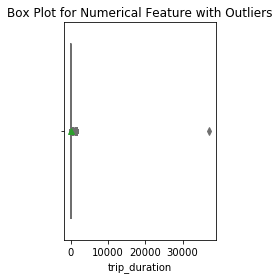

In [47]:
# Identify outliers using box plots or other methods
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Box plot for a numerical feature
# Customized box plot with color, notch, and individual data points
ax = plt.subplot(1, 2, 1)
sns.boxplot(x=dataframe['trip_duration'], color='skyblue', notch=True, showfliers=True, showmeans=True, ax=ax)
plt.title('Box Plot for Numerical Feature with Outliers')
plt.show()


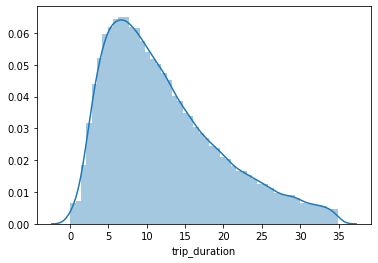

In [48]:
# By observing above percentile method
# 99% of the data falls within a 3438.01-seconds range, let's create a new histogram by excluding the outliers.
def remove_outlier(df):
  Q1 = dataframe.trip_duration.quantile(0.25)
  Q3 = dataframe.trip_duration.quantile(0.75)
  IQR = Q3 - Q1
  lb = Q1 - 1.5 * IQR
  ub = Q3 + 1.5 * IQR
  return dataframe[dataframe.trip_duration<=ub]

filter_data = remove_outlier(df)
sns.distplot(filter_data.trip_duration)

plt.show()

# Discovering Relationships:

##### Employ correlation analysis to discover relationships between different features (pandas supports this with corr).

In [49]:
# corr() function in Pandas is used to calculate the correlation between columns in a DataFrame.
# Correlation is a statistical measure that quantifies the strength and direction of the linear relationship between two variables.
correlation_matrix=dataframe.corr()
correlation_matrix

vendor_id  passenger_count  pickup_longitude  \
vendor_id            1.000000         0.290542          0.015850   
passenger_count      0.290542         1.000000          0.001781   
pickup_longitude     0.015850         0.001781          1.000000   
pickup_latitude     -0.000770        -0.003707          0.081376   
dropoff_longitude    0.010680         0.003863          0.417323   
dropoff_latitude     0.005621        -0.004672          0.155075   
store_and_fwd_flag  -0.079060        -0.021581          0.015976   
trip_duration        0.011931         0.005165          0.025245   

                    pickup_latitude  dropoff_longitude  dropoff_latitude  \
vendor_id                 -0.000770           0.010680          0.005621   
passenger_count           -0.003707           0.003863         -0.004672   
pickup_longitude           0.081376           0.417323          0.155075   
pickup_latitude            1.000000           0.193796          0.473276   
dropoff_longitude          0.193796           1.000000          0.208278   
dropoff_latitude           0.473276           0.208278          1.000000   
store_and_fwd_flag        -0.009343           0.008594         -0.013109   
trip_duration             -0.020912           0.017659         -0.017855   

                    store_and_fwd_flag  trip_duration  
vendor_id                    -0.079060       0.011931  
passenger_count              -0.021581       0.005165  
pickup_longitude              0.015976       0.025245  
pickup_latitude              -0.009343      -0.020912  
dropoff_longitude             0.008594       0.017659  
dropoff_latitude             -0.013109      -0.017855  
store_and_fwd_flag            1.000000       0.000849  
trip_duration                 0.000849       1.000000

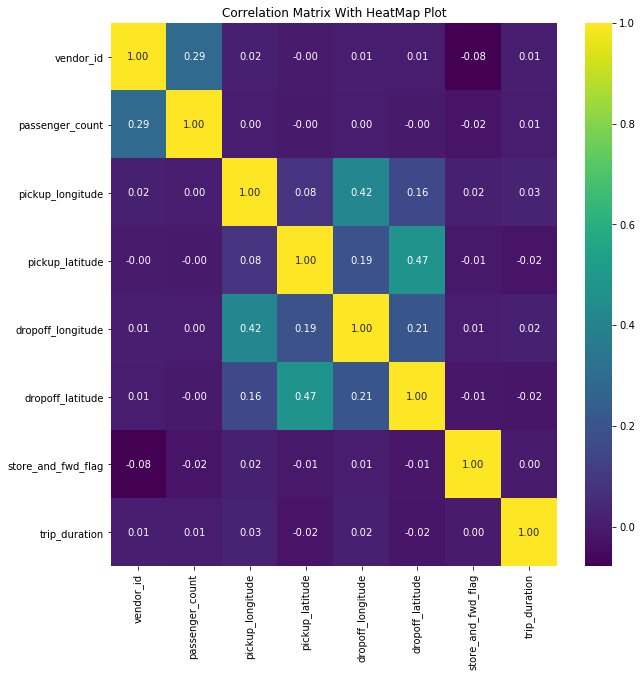

In [50]:
# Length and width of figure size
# heatmap is a data visualization technique that represents the magnitude of a phenomenon as color in two dimensions.
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Matrix With HeatMap Plot')
plt.show()

##### Apply regression analysis to identify significant predictors for trip duration.

In [51]:
# add_constant() is a function provided by StatsModels that adds a intercept column to the given DataFrame.
# Given that take list of columns as a Dependent Variable
X = sm.add_constant(dataframe[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude','store_and_fwd_flag','passenger_count']])
# trip duration is independent variable
y = dataframe['trip_duration']
# OLS() is a function provided by StatsModels for ordinary least squares regression. It takes two main arguments 
# y: (target variable) and X (Predictor Variable)
# It estimates the coefficients of the linear regression model that minimize the sum of squared residuals.
# Prints the whole details with summary function
model_summary = sm.OLS(y, X).fit()

C:\Users\parsi\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [52]:
print(model_summary.summary())

                            OLS Regression Results                            
Dep. Variable:          trip_duration   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     25.56
Date:                Thu, 16 Nov 2023   Prob (F-statistic):           1.61e-30
Time:                        17:35:00   Log-Likelihood:            -6.2759e+05
No. Observations:              100000   AIC:                         1.255e+06
Df Residuals:                   99993   BIC:                         1.255e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.417e+04   1191

##### Explore the possibility of creating new features that might be relevant for analysis.

In [53]:
# Haversine: it will calculate distances between geographical coordinates.
# geopy used to calculate the distance between two sets of coordinates using different distance metrics
# It is a math library
from haversine import haversine, Unit
import geopy.distance
def calculate_distance_miles(row):
# creates a tuple with the latitude and longitude values.    
    pickup_loc = (row['pickup_latitude'], row['pickup_longitude'])
    dropoff_loc = (row['dropoff_latitude'], row['dropoff_longitude'])
    # We Measure this in Miles and rounding by 2 digits
    return round(haversine(pickup_loc, dropoff_loc,unit=Unit.MILES),2)

In [54]:
# Apply() useful for handling complex operations or transformations on data
# dataframe['distance'] = df.apply(calculate_distance_miles, axis=1)
dataframe['distance'] = dataframe.apply(lambda row: calculate_distance_miles(row), axis=1)

In [55]:
dataframe.head(5)

vendor_id     pickup_datetime    dropoff_datetime  passenger_count  \
259524           1 2016-05-12 22:22:52 2016-05-12 22:44:10                1   
871147           1 2016-01-29 12:48:11 2016-01-29 13:06:57                1   
1065803          1 2016-01-06 12:07:19 2016-01-06 12:34:28                1   
807268           1 2016-06-05 16:34:29 2016-06-05 16:57:00                1   
1389135          1 2016-03-07 16:15:32 2016-03-07 16:28:20                1   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
259524         -74.003639        40.727669         -73.975151   
871147         -73.977356        40.789635         -74.001671   
1065803        -73.977783        40.746464         -73.940086   
807268         -73.981651        40.755856         -73.988800   
1389135        -73.977814        40.761353         -73.966713   

         dropoff_latitude  store_and_fwd_flag  trip_duration  distance  
259524          40.783588                   0      21.300000      4.14  
871147          40.739250                   0      18.766667      3.71  
1065803         40.798004                   0      27.150000      4.07  
807268          40.693119                   0      22.516667      4.35  
1389135         40.772266                   0      12.800000      0.95

In [56]:
dataframe['week'] = dataframe['pickup_datetime'].dt.weekday

In [57]:
dataframe['weekend'] = dataframe['pickup_datetime'].dt.weekday.apply(lambda day: 1 if day >= 5 else 0)

In [58]:
dataframe

vendor_id     pickup_datetime    dropoff_datetime  passenger_count  \
259524           1 2016-05-12 22:22:52 2016-05-12 22:44:10                1   
871147           1 2016-01-29 12:48:11 2016-01-29 13:06:57                1   
1065803          1 2016-01-06 12:07:19 2016-01-06 12:34:28                1   
807268           1 2016-06-05 16:34:29 2016-06-05 16:57:00                1   
1389135          1 2016-03-07 16:15:32 2016-03-07 16:28:20                1   
...            ...                 ...                 ...              ...   
554809           2 2016-03-11 09:10:43 2016-03-11 09:17:39                1   
220471           2 2016-06-26 10:00:44 2016-06-26 10:25:58                6   
42862            2 2016-03-27 21:17:37 2016-03-27 21:36:35                2   
408517           1 2016-02-14 19:03:35 2016-02-14 19:15:16                1   
460949           1 2016-05-22 15:27:38 2016-05-22 15:42:15                1   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
259524         -74.003639        40.727669         -73.975151   
871147         -73.977356        40.789635         -74.001671   
1065803        -73.977783        40.746464         -73.940086   
807268         -73.981651        40.755856         -73.988800   
1389135        -73.977814        40.761353         -73.966713   
...                   ...              ...                ...   
554809         -73.978416        40.777931         -73.967079   
220471         -73.873062        40.774120         -73.975998   
42862          -73.874611        40.773911         -73.938873   
408517         -73.982330        40.768394         -73.950989   
460949         -73.987236        40.776127         -73.967644   

         dropoff_latitude  store_and_fwd_flag  trip_duration  distance  week  \
259524          40.783588                   0      21.300000      4.14     3   
871147          40.739250                   0      18.766667      3.71     4   
1065803         40.798004                   0      27.150000      4.07     2   
807268          40.693119                   0      22.516667      4.35     6   
1389135         40.772266                   0      12.800000      0.95     0   
...                   ...                 ...            ...       ...   ...   
554809          40.769428                   0       6.933333      0.83     4   
220471          40.669323                   0      25.233333      9.03     6   
42862           40.786812                   0      18.966667      3.48     6   
408517          40.779346                   0      11.683333      1.81     6   
460949          40.762894                   0      14.616667      1.37     6   

         weekend  
259524         0  
871147         0  
1065803        0  
807268         1  
1389135        0  
...          ...  
554809         0  
220471         1  
42862          1  
408517         1  
460949         1  

[100000 rows x 13 columns]

In [59]:
# add_constant() is a function provided by StatsModels that adds a intercept column to the given DataFrame.
# Given that take list of columns as a Dependent Variable
X = sm.add_constant(dataframe[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude','store_and_fwd_flag','passenger_count','distance']])
# trip duration is independent variable
Y = dataframe['trip_duration']
# OLS() is a function provided by StatsModels for ordinary least squares regression. It takes two main arguments 
# y: (target variable) and X (Predictor Variable)
# It estimates the coefficients of the linear regression model that minimize the sum of squared residuals.
# Prints the whole details with summary function
model_summary = sm.OLS(Y, X).fit()

C:\Users\parsi\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [60]:
print(model_summary.summary())

                            OLS Regression Results                            
Dep. Variable:          trip_duration   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     64.52
Date:                Thu, 16 Nov 2023   Prob (F-statistic):           3.27e-93
Time:                        17:35:08   Log-Likelihood:            -6.2744e+05
No. Observations:              100000   AIC:                         1.255e+06
Df Residuals:                   99992   BIC:                         1.255e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -1609.6532   1500

# Data Visualization:

##### Create visualizations to represent the distribution of key features.

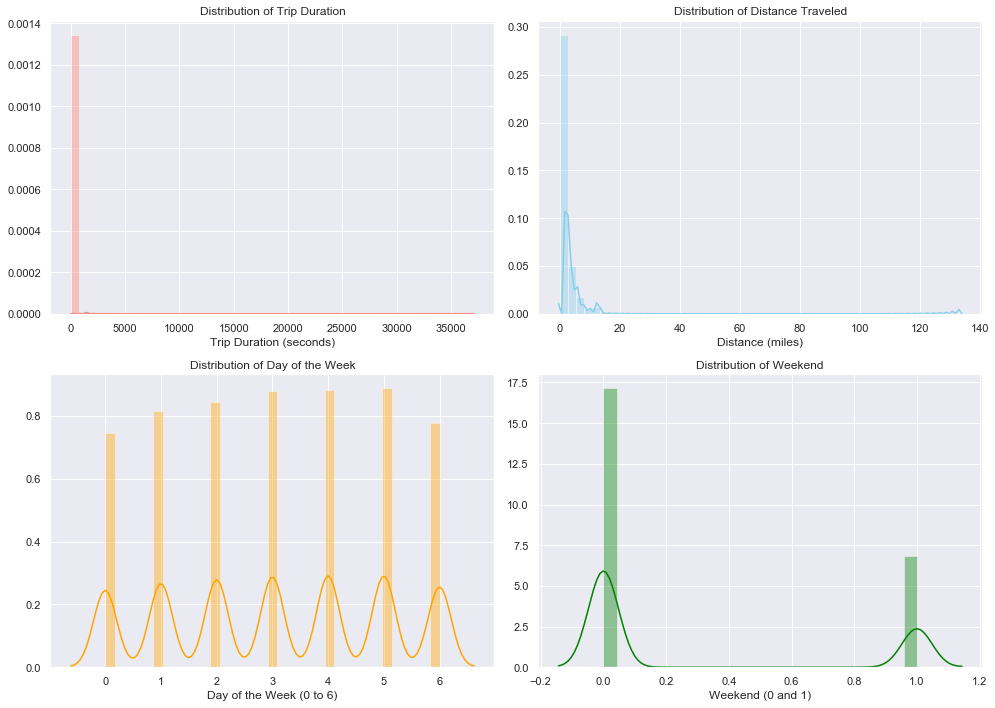

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# sns.set() function from the Seaborn library in Python to set the style for your plots.
sns.set(style="darkgrid")

# Create subplots for multiple visualizations, This function creates a figure and a set of subplots number of rows and columns in the given parameters
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Distribution of trip_duration in Seconds
# distplot is used with kde=True to include both the histogram and the kernel density estimate for the 'trip_duration' column in the top-left subplot.
# Adjust the color, title, and x-axis label as needed.
sns.distplot(dataframe['trip_duration'], kde=True, color='salmon', ax=axes[0, 0])
# Title of the subplot
axes[0, 0].set_title('Distribution of Trip Duration')
# Setting the label for x-axis
axes[0, 0].set_xlabel('Trip Duration (seconds)')

# Distribution of Distance Traveled
sns.distplot(dataframe['distance'], kde=True, color='skyblue', ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Distance Traveled')
axes[0, 1].set_xlabel('Distance (miles)')

# Distribution of Day of the Week
sns.distplot(dataframe['week'], kde=True, color='orange', ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Day of the Week')
axes[1, 0].set_xlabel('Day of the Week (0 to 6)')

# Distribution of Weekend
sns.distplot(dataframe['weekend'], kde=True, color='green', ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Weekend')
axes[1, 1].set_xlabel('Weekend (0 and 1)')

# It Automatically Adjusts the subplots within the figure area without overlapping.
plt.tight_layout()

# Show the plots
plt.show()


##### Visualize the relationship between different features and the trip duration.

Index(['vendor_id', 'pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration', 'distance',
       'week', 'weekend'],
      dtype='object')


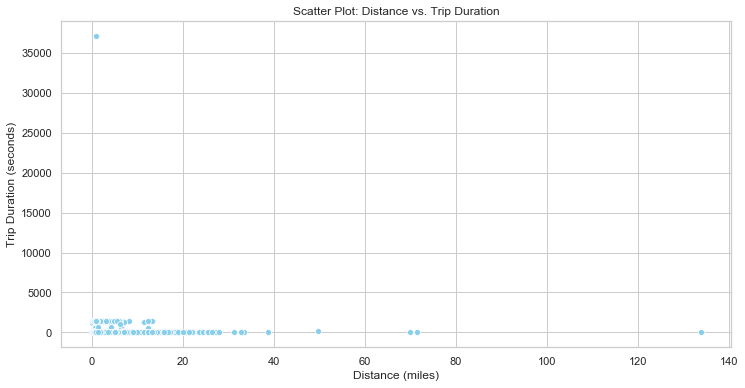

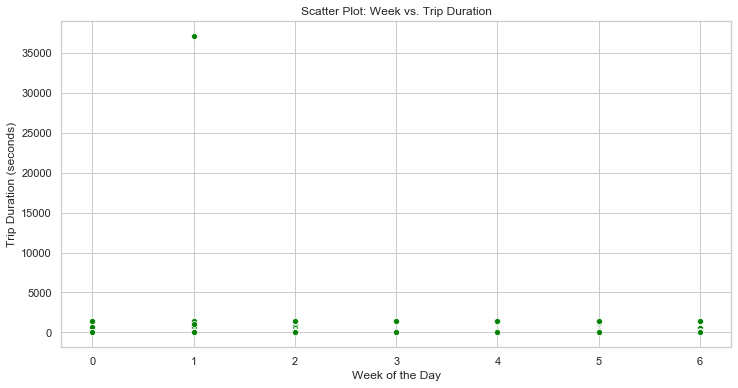

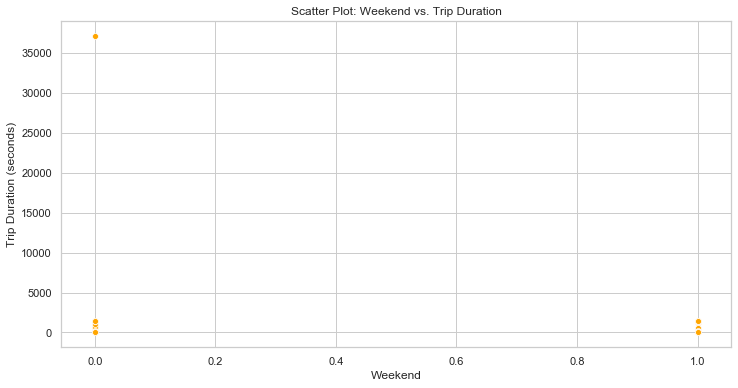

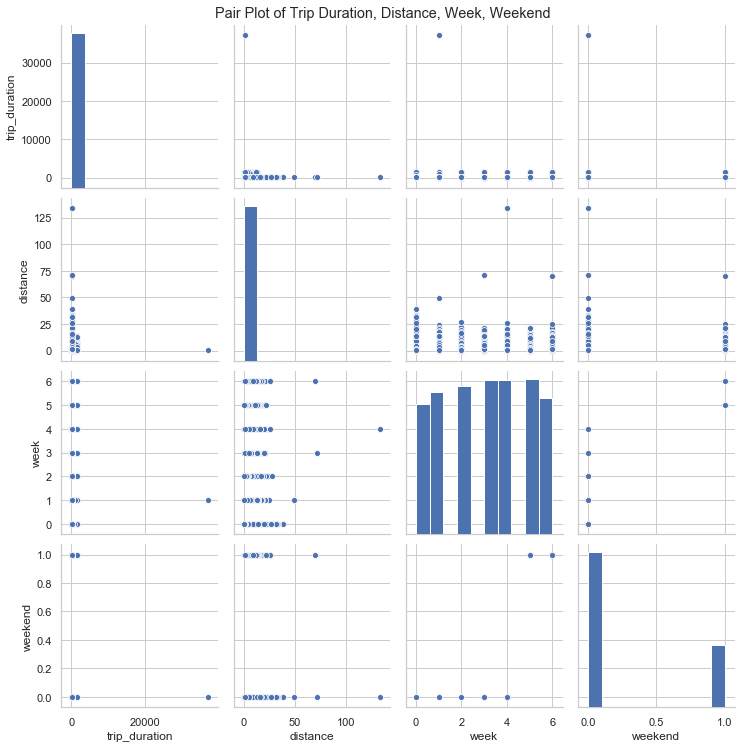

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# sns.set() function from the Seaborn library in Python to set the style for your plots.
sns.set(style="whitegrid")

# Display the column names present in the dataframe
print(dataframe.columns)

# Scatter plot for Distance vs. Trip Duration
# The figsize has 2 parameters width and height
plt.figure(figsize=(12, 6))
sns.scatterplot(x='distance', y='trip_duration', data=dataframe, color='skyblue')
plt.title('Scatter Plot: Distance vs. Trip Duration')
plt.xlabel('Distance (miles)')
plt.ylabel('Trip Duration (seconds)')
plt.show()

# Scatter plot for Week vs. Trip Duration
plt.figure(figsize=(12, 6))
sns.scatterplot(x='week', y='trip_duration', data=dataframe, color='green')
plt.title('Scatter Plot: Week vs. Trip Duration')
plt.xlabel('Week of the Day')
plt.ylabel('Trip Duration (seconds)')
plt.show()

# Scatter plot for Weekend vs. Trip Duration
plt.figure(figsize=(12, 6))
sns.scatterplot(x='weekend', y='trip_duration', data=dataframe, color='orange')
plt.title('Scatter Plot: Weekend vs. Trip Duration')
plt.xlabel('Weekend')
plt.ylabel('Trip Duration (seconds)')
plt.show()

# Pair plot for multiple features
sns.pairplot(dataframe[['trip_duration', 'distance', 'week', 'weekend']])
# y defines the difference between supertitle and chart distance
plt.suptitle('Pair Plot of Trip Duration, Distance, Week, Weekend', y=1.02)
plt.show()


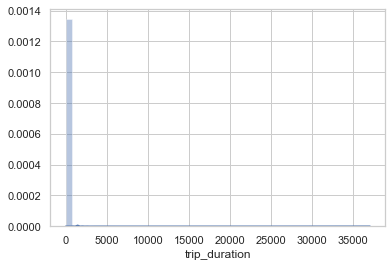

In [63]:
# The plot fails to offer a comprehensive insight into the data due to the substantial variation in trip duration ranges.
sns.distplot(dataframe.trip_duration)

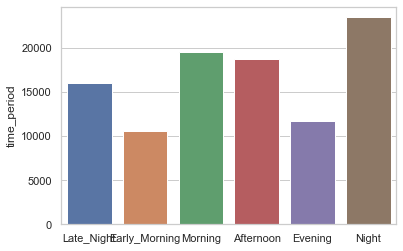

In [75]:
# Created time periods (Late_Night, Early_Morning, Morning, Afternoon, Evening, Night)
time_periods = ["Late_Night", "Early_Morning", "Morning", "Afternoon", "Evening", "Night"]
# Time Between 12Am to 4Am it is Late_Night time Gap between each interval
bins = [-1,4,8, 12, 16,20, 24]
# Based on pickup_datetime it is analyzing the data.
dataframe['time_period'] = pd.cut(dataframe['pickup_datetime'].dt.hour, bins=bins, labels=time_periods)
# Doing Groupby at each Interval and counting the size.
time_period_group = dataframe.groupby('time_period').size()
sns.barplot(x = dataframe.time_period.unique(), y = dataframe.time_period.value_counts());

In [76]:
dataframe

vendor_id     pickup_datetime    dropoff_datetime  passenger_count  \
259524           1 2016-05-12 22:22:52 2016-05-12 22:44:10                1   
871147           1 2016-01-29 12:48:11 2016-01-29 13:06:57                1   
1065803          1 2016-01-06 12:07:19 2016-01-06 12:34:28                1   
807268           1 2016-06-05 16:34:29 2016-06-05 16:57:00                1   
1389135          1 2016-03-07 16:15:32 2016-03-07 16:28:20                1   
...            ...                 ...                 ...              ...   
554809           2 2016-03-11 09:10:43 2016-03-11 09:17:39                1   
220471           2 2016-06-26 10:00:44 2016-06-26 10:25:58                6   
42862            2 2016-03-27 21:17:37 2016-03-27 21:36:35                2   
408517           1 2016-02-14 19:03:35 2016-02-14 19:15:16                1   
460949           1 2016-05-22 15:27:38 2016-05-22 15:42:15                1   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
259524         -74.003639        40.727669         -73.975151   
871147         -73.977356        40.789635         -74.001671   
1065803        -73.977783        40.746464         -73.940086   
807268         -73.981651        40.755856         -73.988800   
1389135        -73.977814        40.761353         -73.966713   
...                   ...              ...                ...   
554809         -73.978416        40.777931         -73.967079   
220471         -73.873062        40.774120         -73.975998   
42862          -73.874611        40.773911         -73.938873   
408517         -73.982330        40.768394         -73.950989   
460949         -73.987236        40.776127         -73.967644   

         dropoff_latitude  store_and_fwd_flag  trip_duration  distance  week  \
259524          40.783588                   0      21.300000      4.14     3   
871147          40.739250                   0      18.766667      3.71     4   
1065803         40.798004                   0      27.150000      4.07     2   
807268          40.693119                   0      22.516667      4.35     6   
1389135         40.772266                   0      12.800000      0.95     0   
...                   ...                 ...            ...       ...   ...   
554809          40.769428                   0       6.933333      0.83     4   
220471          40.669323                   0      25.233333      9.03     6   
42862           40.786812                   0      18.966667      3.48     6   
408517          40.779346                   0      11.683333      1.81     6   
460949          40.762894                   0      14.616667      1.37     6   

         weekend time_period  
259524         0       Night  
871147         0     Morning  
1065803        0     Morning  
807268         1   Afternoon  
1389135        0   Afternoon  
...          ...         ...  
554809         0     Morning  
220471         1     Morning  
42862          1       Night  
408517         1     Evening  
460949         1   Afternoon  

[100000 rows x 14 columns]

C:\Users\parsi\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


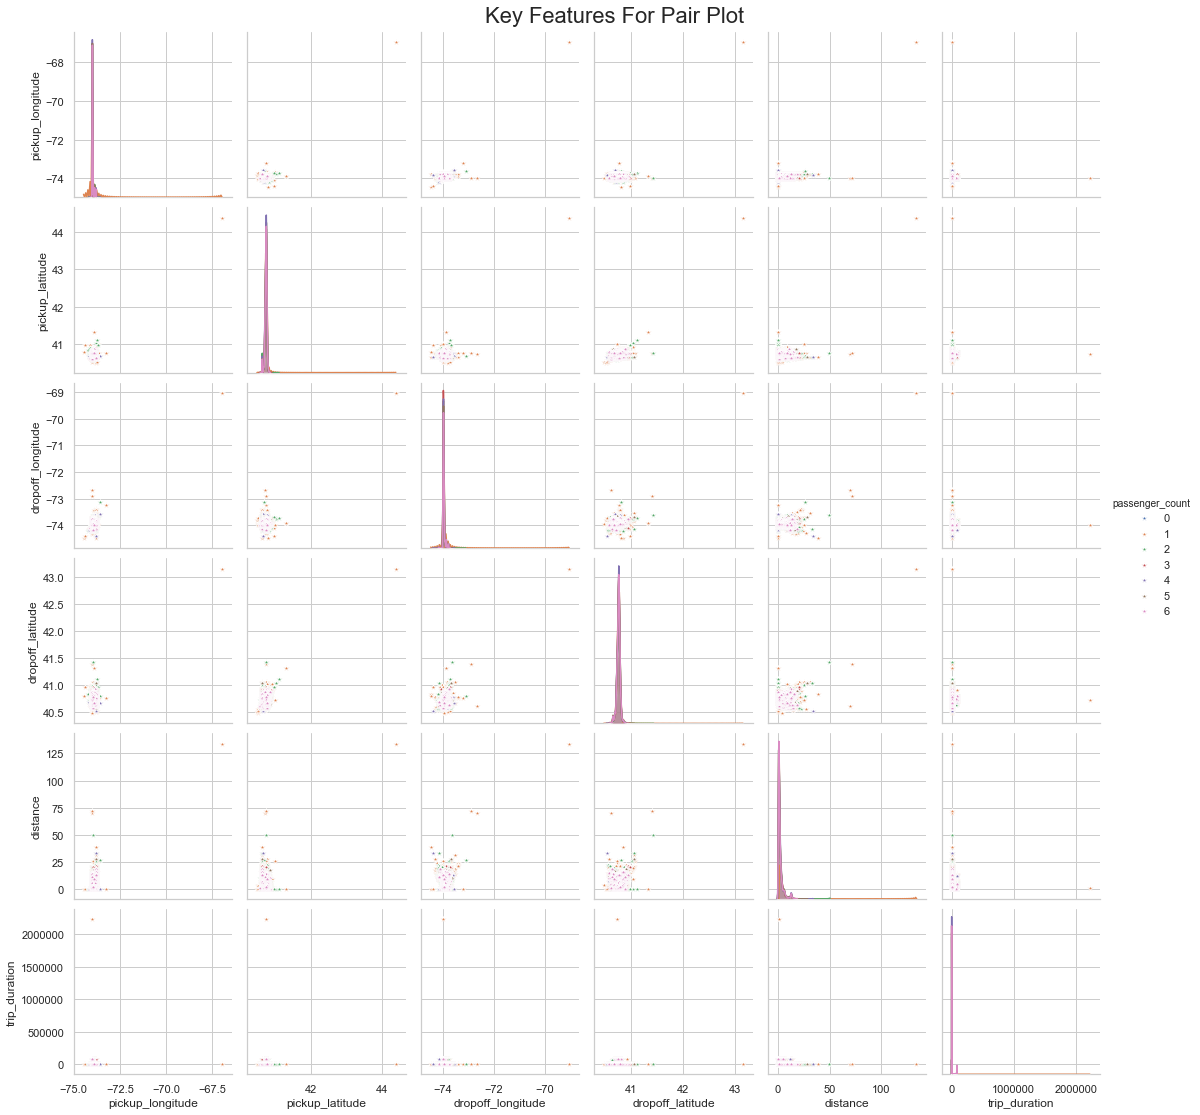

In [36]:
key_features = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'distance', 'trip_duration']
sns.pairplot(dataframe[key_features], kind='scatter', hue='passenger_count', markers='*')
plt.suptitle('Key Features For Pair Plot', y=1.02, fontsize=22)
plt.show()

##### Employ geographic visualizations to represent pickup and drop-off locations.

In [37]:
# It Extends the data manipulation capabilities of the pandas library to spatial data. 
# It provides a convenient and efficient way to work with geospatial data.
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


C:\Users\parsi\Anaconda3\lib\site-packages\geopandas\plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


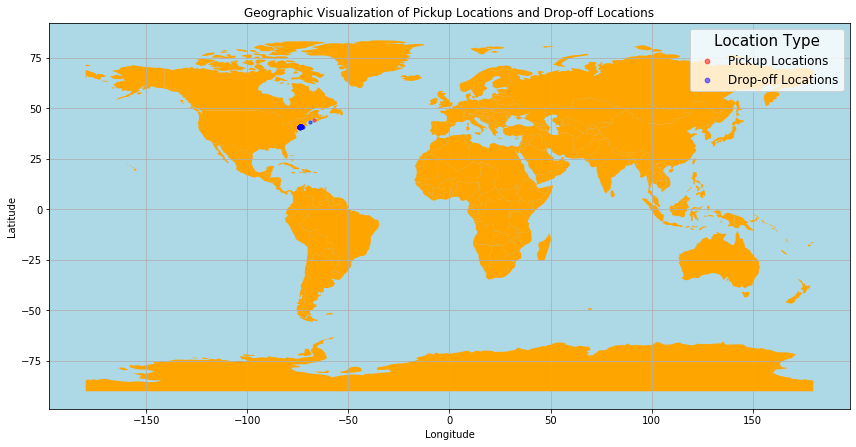

In [26]:
import geopandas as gpd
# Point class from the shapely.geometry module. These are commonly used when working with geospatial data in Python. 
# The Point class from shapely.geometry is often used to create geometric point objects.
from shapely.geometry import Point
import matplotlib.pyplot as plt

# It's a list comprehension to create a list of Point geometries from the pickup_longitude and pickup_latitude columns of a DataFrame.
geometry_pickup_lon_lat = [Point(xy) for xy in zip(dataframe['pickup_longitude'], dataframe['pickup_latitude'])]
geometry_dropoff_lon_lat = [Point(xy) for xy in zip(dataframe['dropoff_longitude'], dataframe['dropoff_latitude'])]

# Adding both pickup and dropoff latitude and longitude
geometry_combined = geometry_pickup_lon_lat + geometry_dropoff_lon_lat
# We use this GeoDataFrame for spatial operations, analysis, and visualization with geopandas functions.
gdf = gpd.GeoDataFrame(geometry=geometry_combined)

# The dataset naturalearth_lowres is a built-in dataset provided by geopandas and contains low-resolution geometries of countries around the world.
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# figsize having 2 parameters width and height of the plot
fig, ax = plt.subplots(figsize=(12, 8))
# Countries are coloured as orange in the plot
world.plot(ax=ax, color='Orange')

# For filter rows from gdf and then plot those rows with red markers and It is a Legend
gdf[gdf.index < len(geometry_pickup_lon_lat)].plot(ax=ax, markersize=10, color='red', alpha=0.5, label='Pickup Locations')
gdf[gdf.index >= len(geometry_pickup_lon_lat)].plot(ax=ax, markersize=10, color='blue', alpha=0.5, label='Drop-off Locations')

# X-Axis Labelling
ax.set_xlabel('Longitude')
# Y-Axis Labelling
ax.set_ylabel('Latitude')
# Face color of the map
ax.set_facecolor('lightblue')

plt.title('Geographic Visualization of Pickup Locations and Drop-off Locations')
# Adding Grid Lines Defalut is False
plt.grid(True)
plt.tight_layout()
plt.legend(title='Location Type', title_fontsize='15', loc='upper right', fontsize='12', markerscale=1.5)
plt.show()

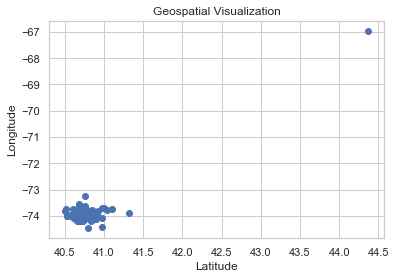

In [40]:
# Scatter Plot
plt.scatter(dataframe.pickup_latitude, dataframe.pickup_longitude)
plt.ylabel('Longitude')
plt.xlabel('Latitude')
plt.title('Geospatial Visualization')
plt.show()